In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import re
import nltk
import string

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

# **Training Data**

In [ ]:
x = "/content/train_data.txt"
y = pd.read_csv(x, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
y.head()


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


# **Testing Data**

In [ ]:
X = "/content/test_data.txt"
Y = pd.read_csv(X, sep=':::', names=['Id','Title','Description'], engine='python')
Y.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
y.describe()

,Title,Genre,Description
count,7935,7935,7935
unique,7935,27,7931
top,Oscar et la dame rose (2009),drama,Award of the American academy of cinematograp...
freq,1,1967,3


In [ ]:
Y.describe()

,Id
count,9822.000000
mean,4911.500000
std,2835.511506
min,1.000000
25%,2456.250000
50%,4911.500000
75%,7366.750000
max,9822.000000


In [ ]:
y.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
Y.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

# **Classification Of Genre**

In [ ]:
class_d = y['Genre'].value_counts()
class_d

Genre
 drama           1967
 documentary     1924
 comedy          1081
 short            741
 horror           319
 thriller         271
 action           190
 western          153
 reality-tv       129
 family           114
 adventure        111
 music            105
 sci-fi            97
 adult             96
 romance           85
 animation         72
 sport             64
 crime             63
 talk-show         58
 fantasy           50
 mystery           49
 biography         44
 history           39
 musical           39
 game-show         31
 news              23
 war               20
Name: count, dtype: int64

In [ ]:
imbalance_r = class_d.min()/class_d.max()
imbalance_r

0.010167768174885612

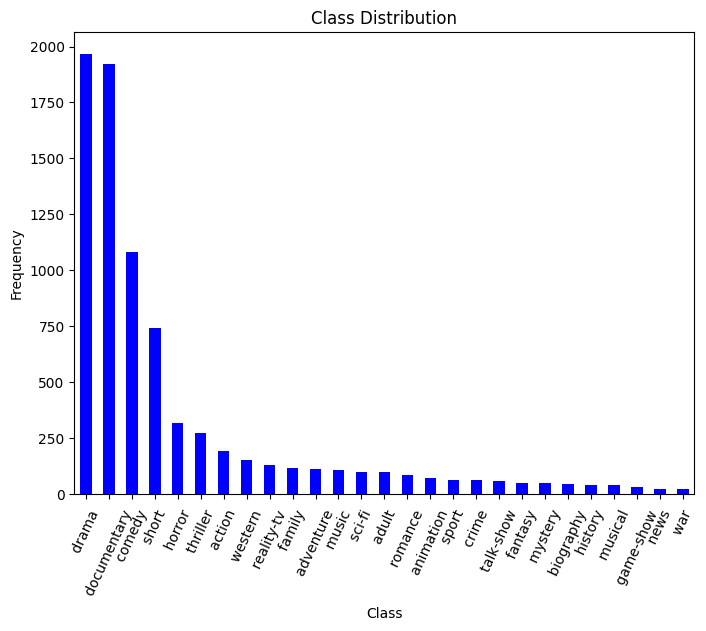

In [ ]:
plt.figure(figsize=(8, 6))
class_d.plot(kind='bar', color='Blue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

# **MODELLING**

In [ ]:
tfidfVectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidfVectorizer.fit_transform(y['Description'])
Y_train = y['Genre']

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, Y_train)

Y_train_pred = nb_classifier.predict(X_train_tfidf)

print("Accuracy on training set:", accuracy_score(Y_train, Y_train_pred))
print("Classification Report on training set:\n", classification_report(Y_train, Y_train_pred))

Accuracy on training set: 0.4959042218021424


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report on training set:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00       190
       adult        0.00      0.00      0.00        96
   adventure        0.00      0.00      0.00       111
   animation        0.00      0.00      0.00        72
   biography        0.00      0.00      0.00        44
      comedy        0.74      0.33      0.46      1081
       crime        0.00      0.00      0.00        63
 documentary        0.57      0.92      0.71      1924
       drama        0.41      0.90      0.57      1967
      family        0.00      0.00      0.00       114
     fantasy        0.00      0.00      0.00        50
   game-show        0.00      0.00      0.00        31
     history        0.00      0.00      0.00        39
      horror        1.00      0.01      0.02       319
       music        0.00      0.00      0.00       105
     musical        0.00      0.00      0.00        39
     mystery        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **PREDICTION**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_test = tfidf_vectorizer.fit_transform(Y['Description'])

In [ ]:
X_test_predictions = nb_classifier.predict(X_test)
Y['Predicted_Genre'] = X_test_predictions

In [ ]:
Y.to_csv('predicted_genres.csv', index=False)

Y

,Id,Title,Description,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",documentary
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",documentary
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,documentary
...,...,...,...,...
9817,9818,"""We're Here Now"" (2016)",New York columnist and relationship advisor C...,comedy
9818,9819,Milo (2012/I),"Milo, an isolated 10-year-old boy with 'sensi...",documentary
9819,9820,Candido: Hands of Fire (2005),Ivn Acostas 68-minute documentary focuses on ...,drama
9820,9821,Martha Graham's Celebration (2010),Celebration is a minimalist study of joy. It ...,documentary
